<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/unsupervised/02_dimensionality_reduction/04_pca_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import bibliotek

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


###Wygenerowanie danych

In [13]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Obcięcie obrazów do pierwszych 5000

In [14]:
X_train = X_train[:5000]
X_test = X_test[:5000]

Wizualizacja kilku obrazów

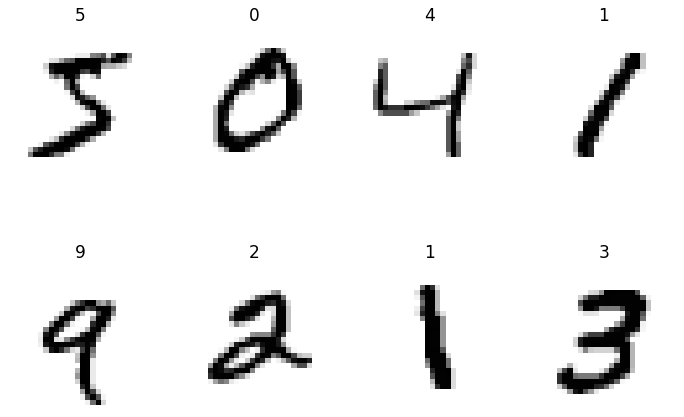

In [16]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='black', fontsize=17)
    plt.axis('off')
plt.show()

Wypłaszczenie obrazów i standaryzacja

In [18]:
X_train = X_train.reshape(-1, 28 * 28)

In [19]:
X_train = X_train / 255

###PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pce = pca.fit_transform(X_train)
X_train_pce.shape

(5000, 148)

Wyjaśniona wariancja

In [24]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [26]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA', width=950, template='plotly_dark'))
fig.show()

Odwrócenie metody PCA

In [28]:
approx = pca.inverse_transform(X_train_pce) 
approx[0].shape

(784,)

In [29]:
X_train_pce[0].shape

(148,)

In [30]:
X_train[0].shape

(784,)

Wizualizacja

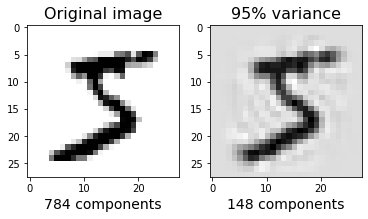

In [35]:
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray_r',interpolation='nearest')
plt.xlabel('784 components', color='black', fontsize=14)
plt.title('Original image', color='black', fontsize=16)

plt.subplot(122)
plt.imshow(approx[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel(f'{pca.n_components_} components', color='black', fontsize=14)
plt.title('95% variance', color='black', fontsize=16)
plt.show()

###Porównanie procentu wyjaśnionej wariancji

In [39]:
def make_pca(n_components, data, idx=0):

    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    approx = pca.inverse_transform(data_pca)

    plt.imshow(approx[idx].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.xlabel(f'{pca.n_components_} components', color='black', fontsize=12)
    plt.title(f'{str(n_components)}% var', color='black', fontsize=15)

Wizualizacja 5

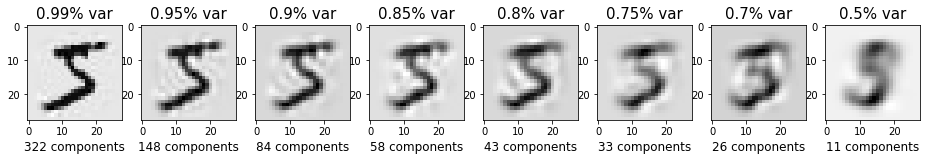

In [40]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train)
plt.show()

Wizualizacja: 0

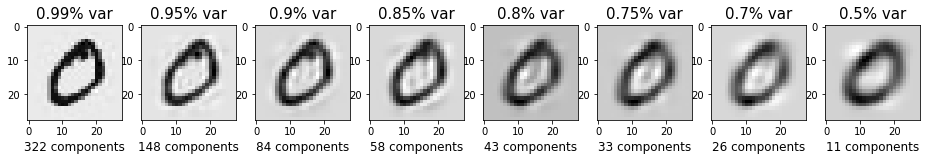

In [41]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=1)
plt.show()

Wizualizacja 9 

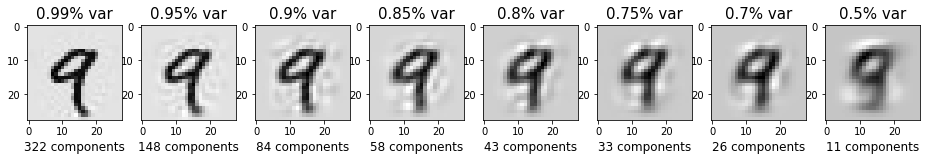

In [42]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=4)
plt.show()